Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [4]:
df = pd.read_csv('/content/train.csv')

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

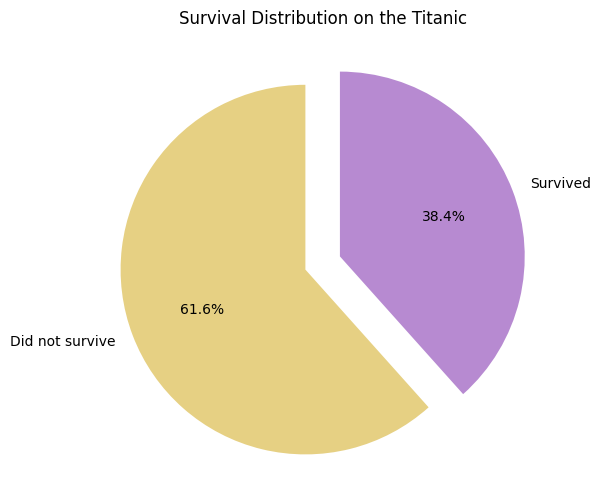

In [18]:
survival_counts = df['Survived'].value_counts()
labels = ['Did not survive', 'Survived']
colors = ['#e6d083', '#b78ad1']
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=[0.1, 0.1])
plt.title('Survival Distribution on the Titanic')
plt.show()


Тих, хто вижив, було помітно менше, ніж тих, хто загинув. Це свідчить про загально низький рівень виживання.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


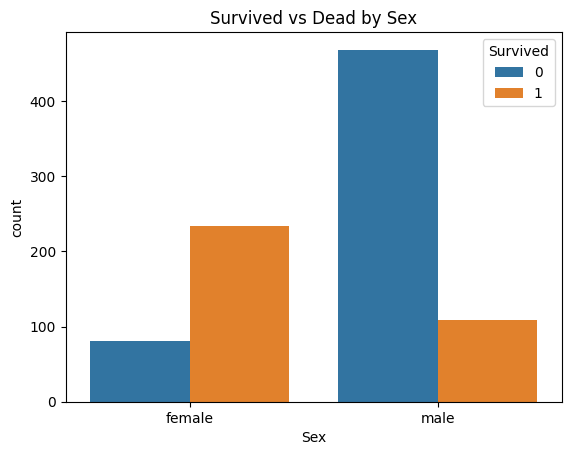

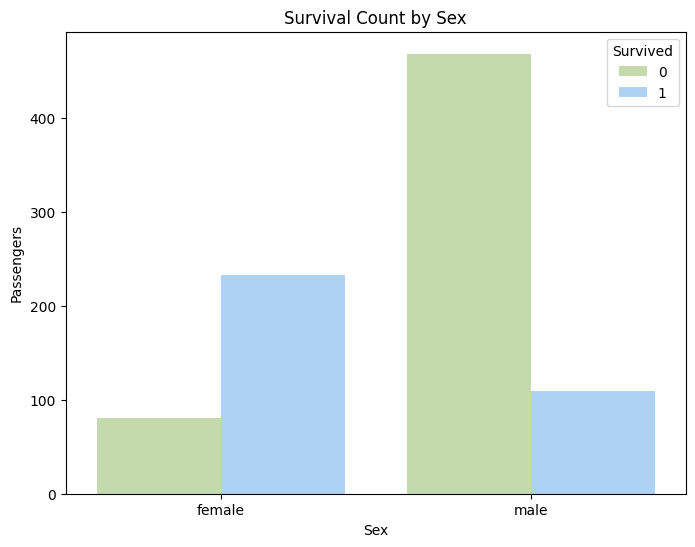

In [65]:
sex_survival = df.groupby(['Sex', 'Survived'], as_index=False).size()
sex_survival['Survived'] = sex_survival['Survived'].map({0: '0', 1: '1'})
plt.figure(figsize=(8, 6))
sns.barplot(data=sex_survival, x='Sex', y='size', hue='Survived', palette = ['#C5E1A5', '#A2D2FF'])
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Passengers')
plt.legend(title='Survived')
plt.show()

З графіку чітко видно різницю у виживанні між чоловіками і жінками. Порівняно з чоловіками, жінок вижило значно більше, що може вказувати на пріоритетність в рятуванні. Серед жінок врятувалась приблизно 3/4, у той час як серед чоловіків — приблизно 1/5.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

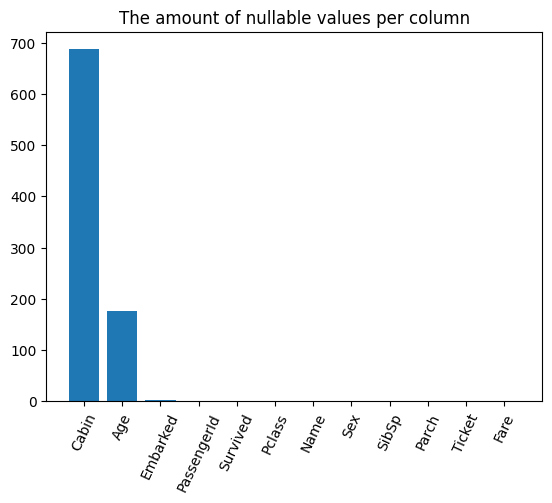

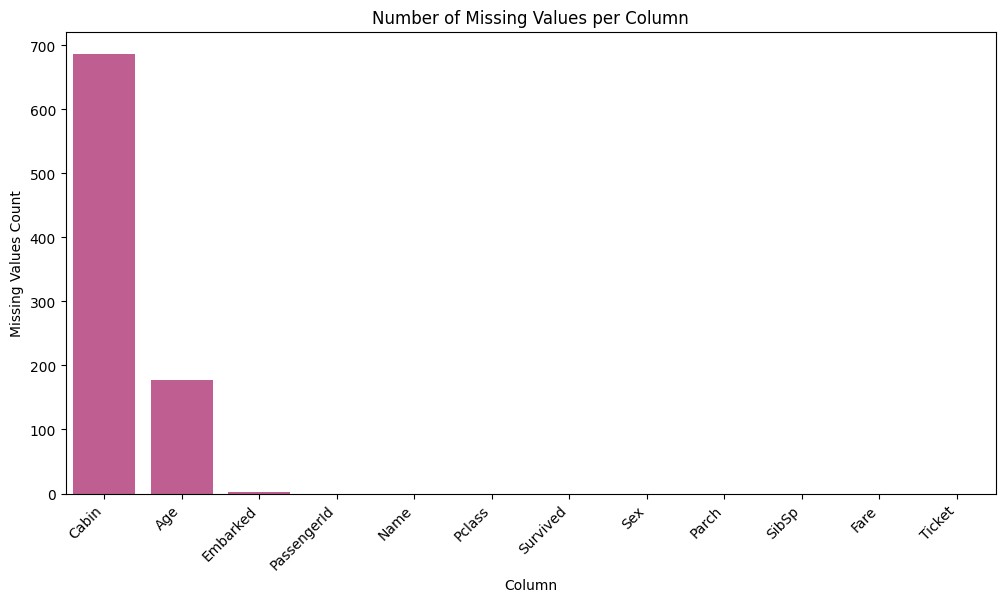

In [51]:
missing_values = df.isnull().sum()
missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, color='#cf4e91')
plt.title('Number of Missing Values per Column')
plt.xlabel('Column')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=45, ha='right')
plt.show()


Ми бачимо кількість пустих значень для кожної змінної. Найбільше їх у колонках Cabin та Age. Це важливо, адже при аналізі пропуски можут спотворити висновки. Нам неоюхідно звернути увагу на колонки з великою кількістю пропущених значень, і або переробити ці стовпці, або знайти спосіб, як доповнити пусті комірки.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

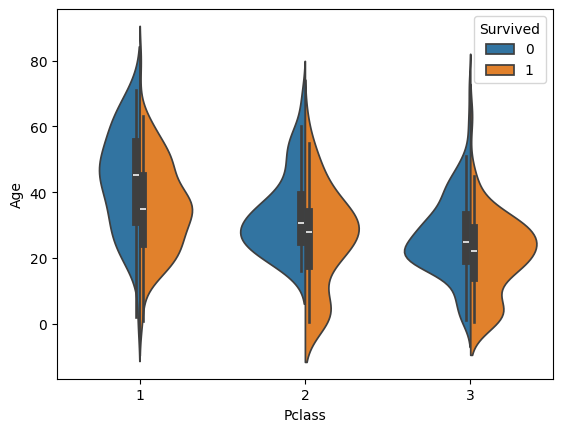

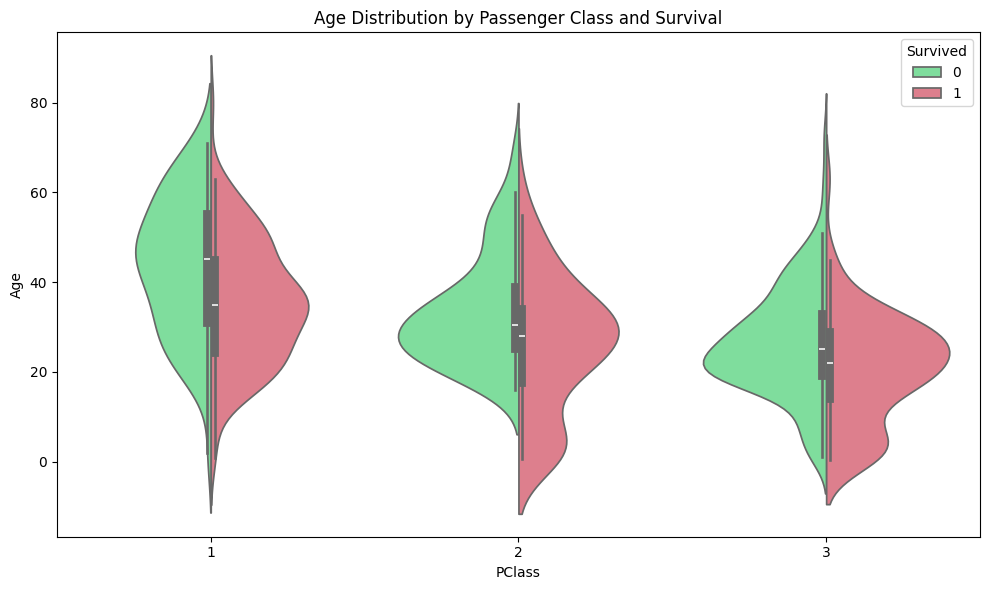

In [76]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', data=df, hue='Survived', palette={0: '#6fed97', 1: '#ed6f82'}, split=True)
plt.title('Age Distribution by Passenger Class and Survival')
plt.xlabel('PClass')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

1-й клаc:
* Більше виживших у віковій групі від 30 до 60 років. Це найбільш рівномірно розподілена за віком категорія людей.
* Розподіл не виживших більш широкий. Порівняно з не вижившими пасажирами інших класів, розподіл за віком достатньо рівномірний.

2-й клас:

* Не виживших було найбільше у віковій групі 20–40 років, але вони розподілені рівномірніше, ніж виживші цього ж класу.
* Виживших так само було найбільше серед людей 20-40 років

3-й клас:
* Більшість не виживших — молодь (20–30 років)
* Виживші представлені рівномірніше, але найбільше їх у віковій категорї 20-30 років.





6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


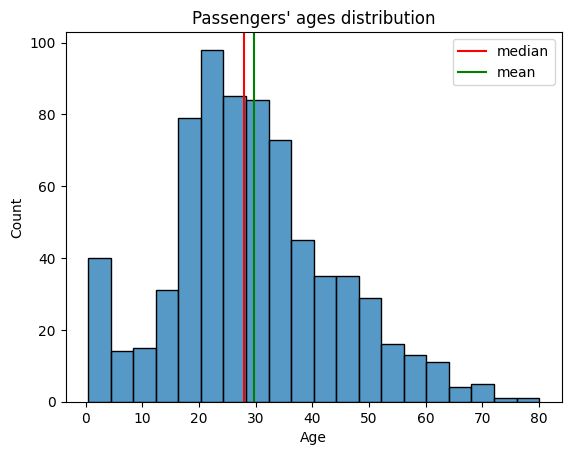

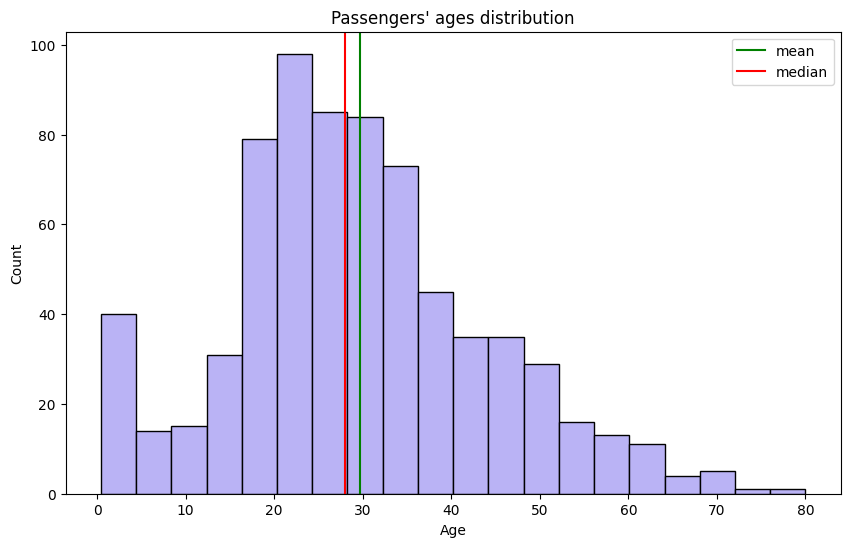

In [59]:
ages = df['Age'].dropna()
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, color='#bab3f5', edgecolor='black')
plt.axvline(ages.mean(), color='green', label='mean')
plt.axvline(ages.median(), color='red', label='median')
plt.title("Passengers' ages distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()


* Найбільше пасажирів були у віці від 20 до 30 років (особливо 20-25 років — найбільша кількість)
* Медіана трохи менша за середнє значення
* Є помітна кількість дітей віком до 10 років. Особливо 0-5 років.
* Зустрічаються пасажири віком 50-80 років, але їх дуже мало.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Чи впливає на ймовірність виживання той факт, що пасажир подорожував один чи з родиною?

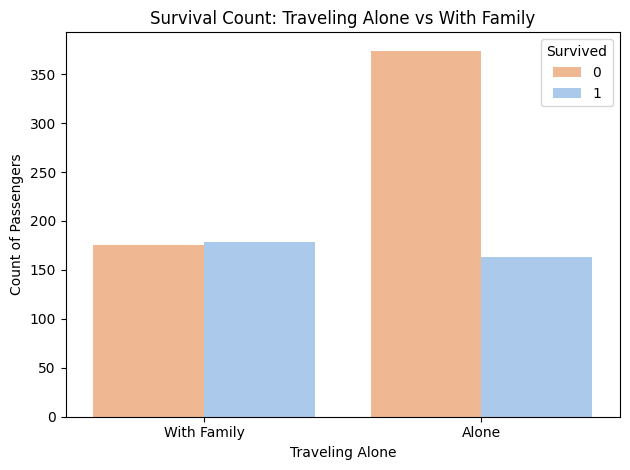

In [75]:
df['TravelAlone'] = (df['SibSp'] + df['Parch'] == 0)
travel_survival = df.groupby(['TravelAlone', 'Survived'], as_index=False).size()
travel_survival['Survived'] = travel_survival['Survived'].map({0: '0', 1: '1'})
sns.barplot(data=travel_survival, x='TravelAlone', y='size', hue='Survived', palette=['#ffb482', '#a1c9f4'])
plt.title("Survival Count: Traveling Alone vs With Family")
plt.xlabel("Traveling Alone")
plt.ylabel("Count of Passengers")
plt.xticks([0, 1], ["With Family", "Alone"])
plt.legend(title="Survived")
plt.tight_layout()
plt.show()


У відсотковому співвідношенні, людей, які подорожували наодинці, померло значно більше, ніж тих, хто подорожував із родиною. Серед тих, хто подорожував з рідними приблизно однакова кількість загиблих та виживших. Серед тих, хто подорожував один, співвідношення виживших до померлих приблизно 1:2.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

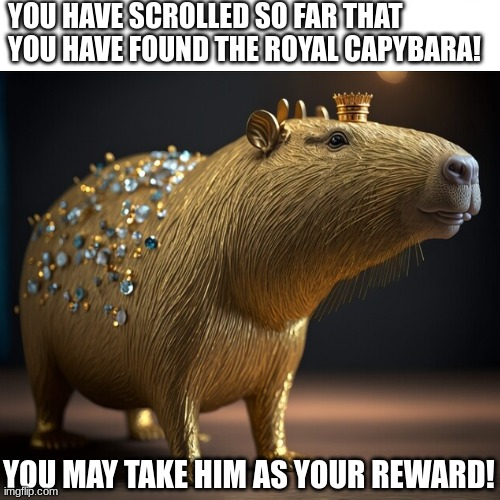

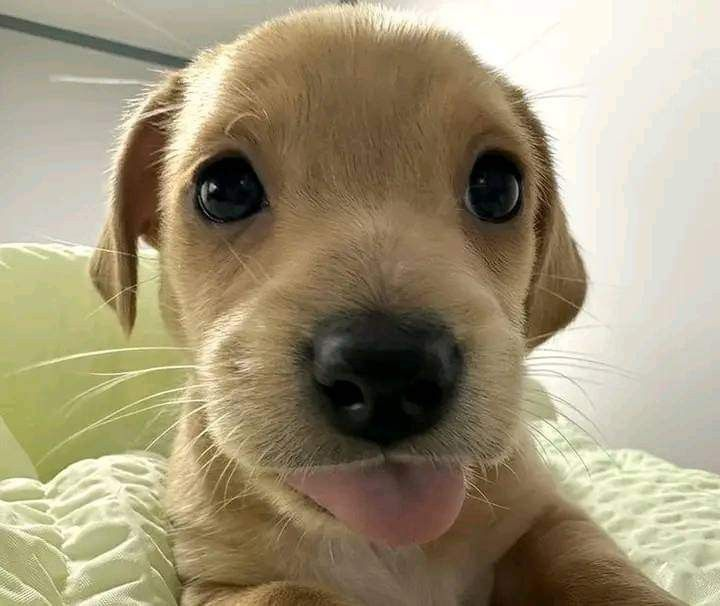